# Multivariable Regression

In [16]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# datasets 
from sklearn.datasets import load_boston

# train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
boston = load_boston()

In [5]:
# convert to a dataframe 
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)

# add a column with the price 
data['PRICE'] = boston.target

## Dataset split for train and test

In [7]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

In [15]:
# create the repeatable split
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42 )

In [17]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('Intercept: ', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=x_train.columns, columns=['COEF'])

Intercept:  30.24675099392408


,COEF
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


In [20]:
# the r-squared values for the training data 
print('Training data r-squared: ', reg.score(x_train, y_train))
print('Test data r-squared: ', reg.score(x_test, y_test))

Training data r-squared:  0.7508856358979673
Test data r-squared:  0.6687594935356294


## Model Evaluation

In [24]:
# Calculating the skew of our data 
data['PRICE'].skew()

1.1080984082549072

In [25]:
# A competely normal distribution (Perfect bell curve) will have a 
# skew of 0. Both ends are the same, there is n skew. 

### Data Transformations 

In [26]:
# log transformation 
# Creating a linear regression is not possible (or easy) with skewed data, 
# the ln (natural logarithm) allows for us to get the data into a shape that 
# better facilitates the identification of the natural linear regression. 

y_log = np.log(data['PRICE'])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [27]:
# What is the benefit 
# checks y_log skew.
y_log.skew()

-0.33032129530987864

Text(0.5, 1.0, 'Log Price with skew -0.33032129530987864 ')

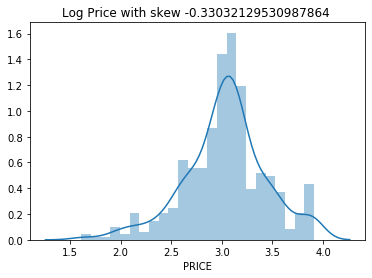

In [28]:
sns.distplot(y_log)
plt.title(f'Log Price with skew {y_log.skew()} ')

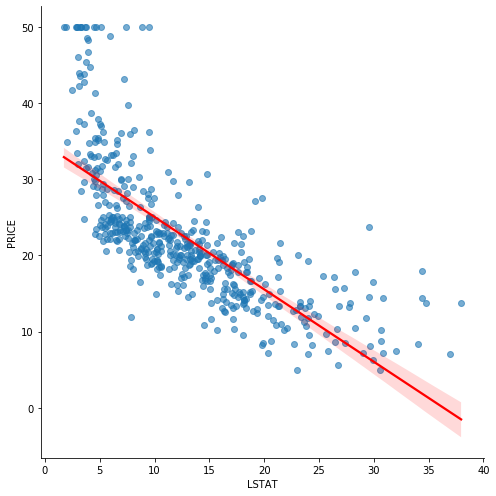

In [30]:
# showing an impefect fit between LSTAT and PRICE 
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, scatter_kws={'alpha': 0.6}, line_kws={'color': 'r'})

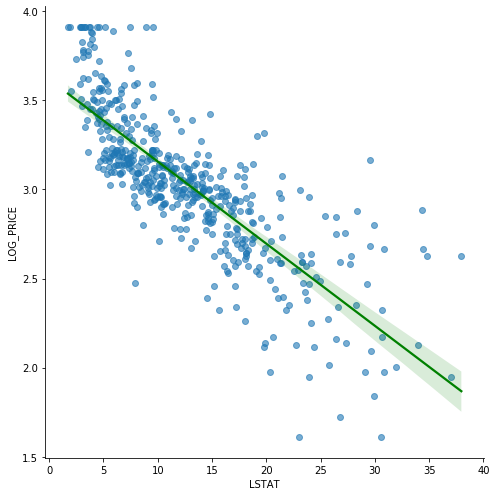

In [31]:
transdata = features
transdata['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transdata, height=7, scatter_kws={'alpha': 0.6}, line_kws={'color': 'g'})

### Update model to use log prices

In [32]:
prices = np.log(data['PRICE']) 
features = data.drop('PRICE', axis=1)

# create the repeatable split
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42 )

reg = LinearRegression()
reg.fit(x_train, y_train)

# the r-squared values for the training data 
print('Training data r-squared: ', reg.score(x_train, y_train))
print('Test data r-squared: ', reg.score(x_test, y_test))

print('Intercept: ', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=x_train.columns, columns=['COEF'])

Training data r-squared:  0.795714923175866
Test data r-squared:  0.7462724975382733
Intercept:  3.840920309917581


,COEF
CRIM,-0.009679
ZN,0.000757
INDUS,0.003057
CHAS,0.096207
NOX,-0.727261
RM,0.113095
AGE,-0.000139
DIS,-0.048944
RAD,0.011139
TAX,-0.000505


In [33]:
# reversing log prices 
# example is the charles river property premium 
np.e**0.096207

1.1009869447050655

In [ ]:
# $1100 as a riverside property premium 